# Baseline Model

**Before Running this notebook, run the notebook 'Pre-Processed.ipynb' (Located in cmse492_project\Data\Pre-Processing) which will create the processed dataframe file 'processed.csv'. Place a copy of that file into this directory (cmse492_project\Models\Baseline Model)** 

In [65]:
import pandas as pd
import matplotlib.pyplot
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score, f1_score

In [66]:
df = pd.read_csv('processed.csv')

**I. Dummy Classifer Model- Strategy: Stratify**

In [67]:
X = df.drop(columns=["Class", "TransactionTime", "Time"])
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
#test size is small because dataset has more than 200,000 entries 
#stratify y to ensure the split of classes is preserved 

dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)

*I. Dummy Classifer Model- Strategy: Stratify - Metrics*

In [68]:
y_pred_probs = dummy_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs, pos_label=1)
#fpr - false positives
#tpr - true posities 
#thresholds - decision threshold for the class 

auroc = auc(fpr, tpr)
#auc is area under curve 

recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"AUROC: {auroc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

AUROC: 0.5094
Recall: 0.0204
F1 Score: 0.0206


*I. Dummy Classifer Model- Strategy: Stratify - AUROC Curve*

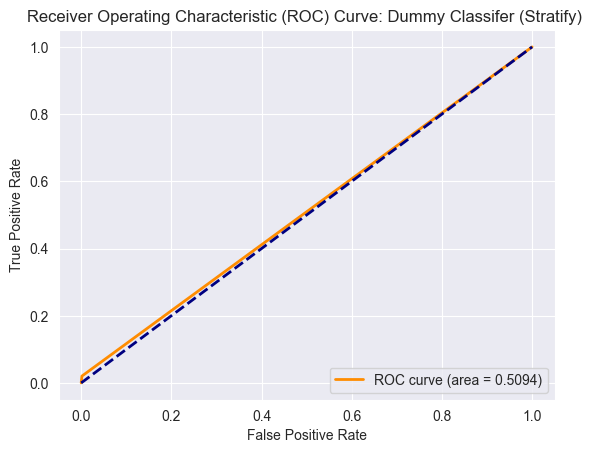

In [69]:
plt.figure()
sns.set_style("darkgrid")
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {auroc:.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # Reference line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve: Dummy Classifer (Stratify) ")
plt.legend(loc="lower right")
plt.show()

**II. Dummy Classifer Model- Strategy: Uniform**

In [70]:
X = df.drop(columns=["Class", "TransactionTime", "Time"])
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
#test size is small because dataset has more than 200,000 entries 
#stratify y to ensure the split of classes is preserved 

dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)


*Dummy Classifer Model- Strategy: Uniform- Metrics*

In [71]:
y_pred_probs = dummy_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs, pos_label=1)
#fpr - false positives
#tpr - true posities 
#thresholds - decision threshold for the class 

auroc = auc(fpr, tpr)
#auc is area under curve 

recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"AUROC: {auroc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

AUROC: 0.5000
Recall: 0.5306
F1 Score: 0.0036


*Dummy Classifer Model- Strategy: Uniform- AUROC Curve*

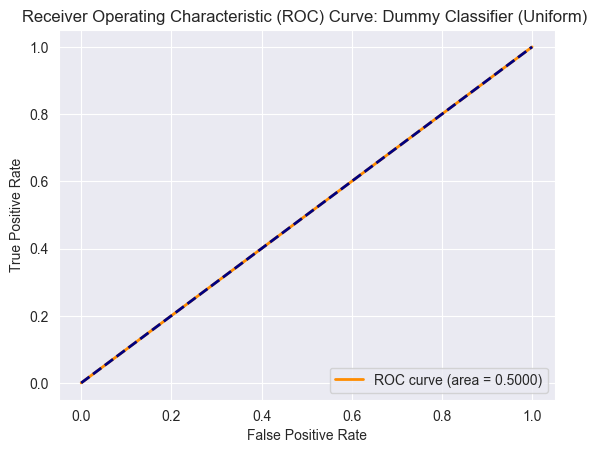

In [72]:
plt.figure()
sns.set_style("darkgrid")
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {auroc:.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # Reference line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve: Dummy Classifier (Uniform) ")
plt.legend(loc="lower right")
plt.show()

Based on these Baseline Models, the metrics to beat are 
- AUROC of .5094
- Recall of .5306
- F1-Score of 0.0206